In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2025-01-06 23:43:01.113796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/survey_kidney.h5ad')

save_dir = '/ix/djishnu/shared/djishnu_kor11/results/survey_kidney'

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_kidney',
    annot='cluster_cat',
    annot_labels='ct2'
)

In [4]:
pythia.compute_betas()

100%|██████████| 2285/2285 [04:06<00:00,  9.28it/s]


In [ ]:
# pythia.plot_beta_map(
#     regulator='Flt3l$Flt3', 
#     target_gene='Bcl2',
#     save_dir=f'{save_dir}/beta_maps/',
#     clusters=[0]
# )
# pythia.plot_beta_map(
#     regulator='Flt3l$Flt3', 
#     target_gene='Bcl2',
#     save_dir=f'{save_dir}/beta_maps/',
#     clusters=[8]
# )

In [8]:
goi = 'Flt3'
goi in pythia.adata.var_names

True

In [ ]:
# pythia.plot_betas_goi(goi=goi, use_simulated=False, clusters=['B']),

In [10]:
pythia.perturb(target=goi, n_propagation=1, gene_expr=0) # set to one for testing purposes

Running simulation 1/1: 100%|██████████| 6959/6959 [06:52<00:00, 16.86it/s]


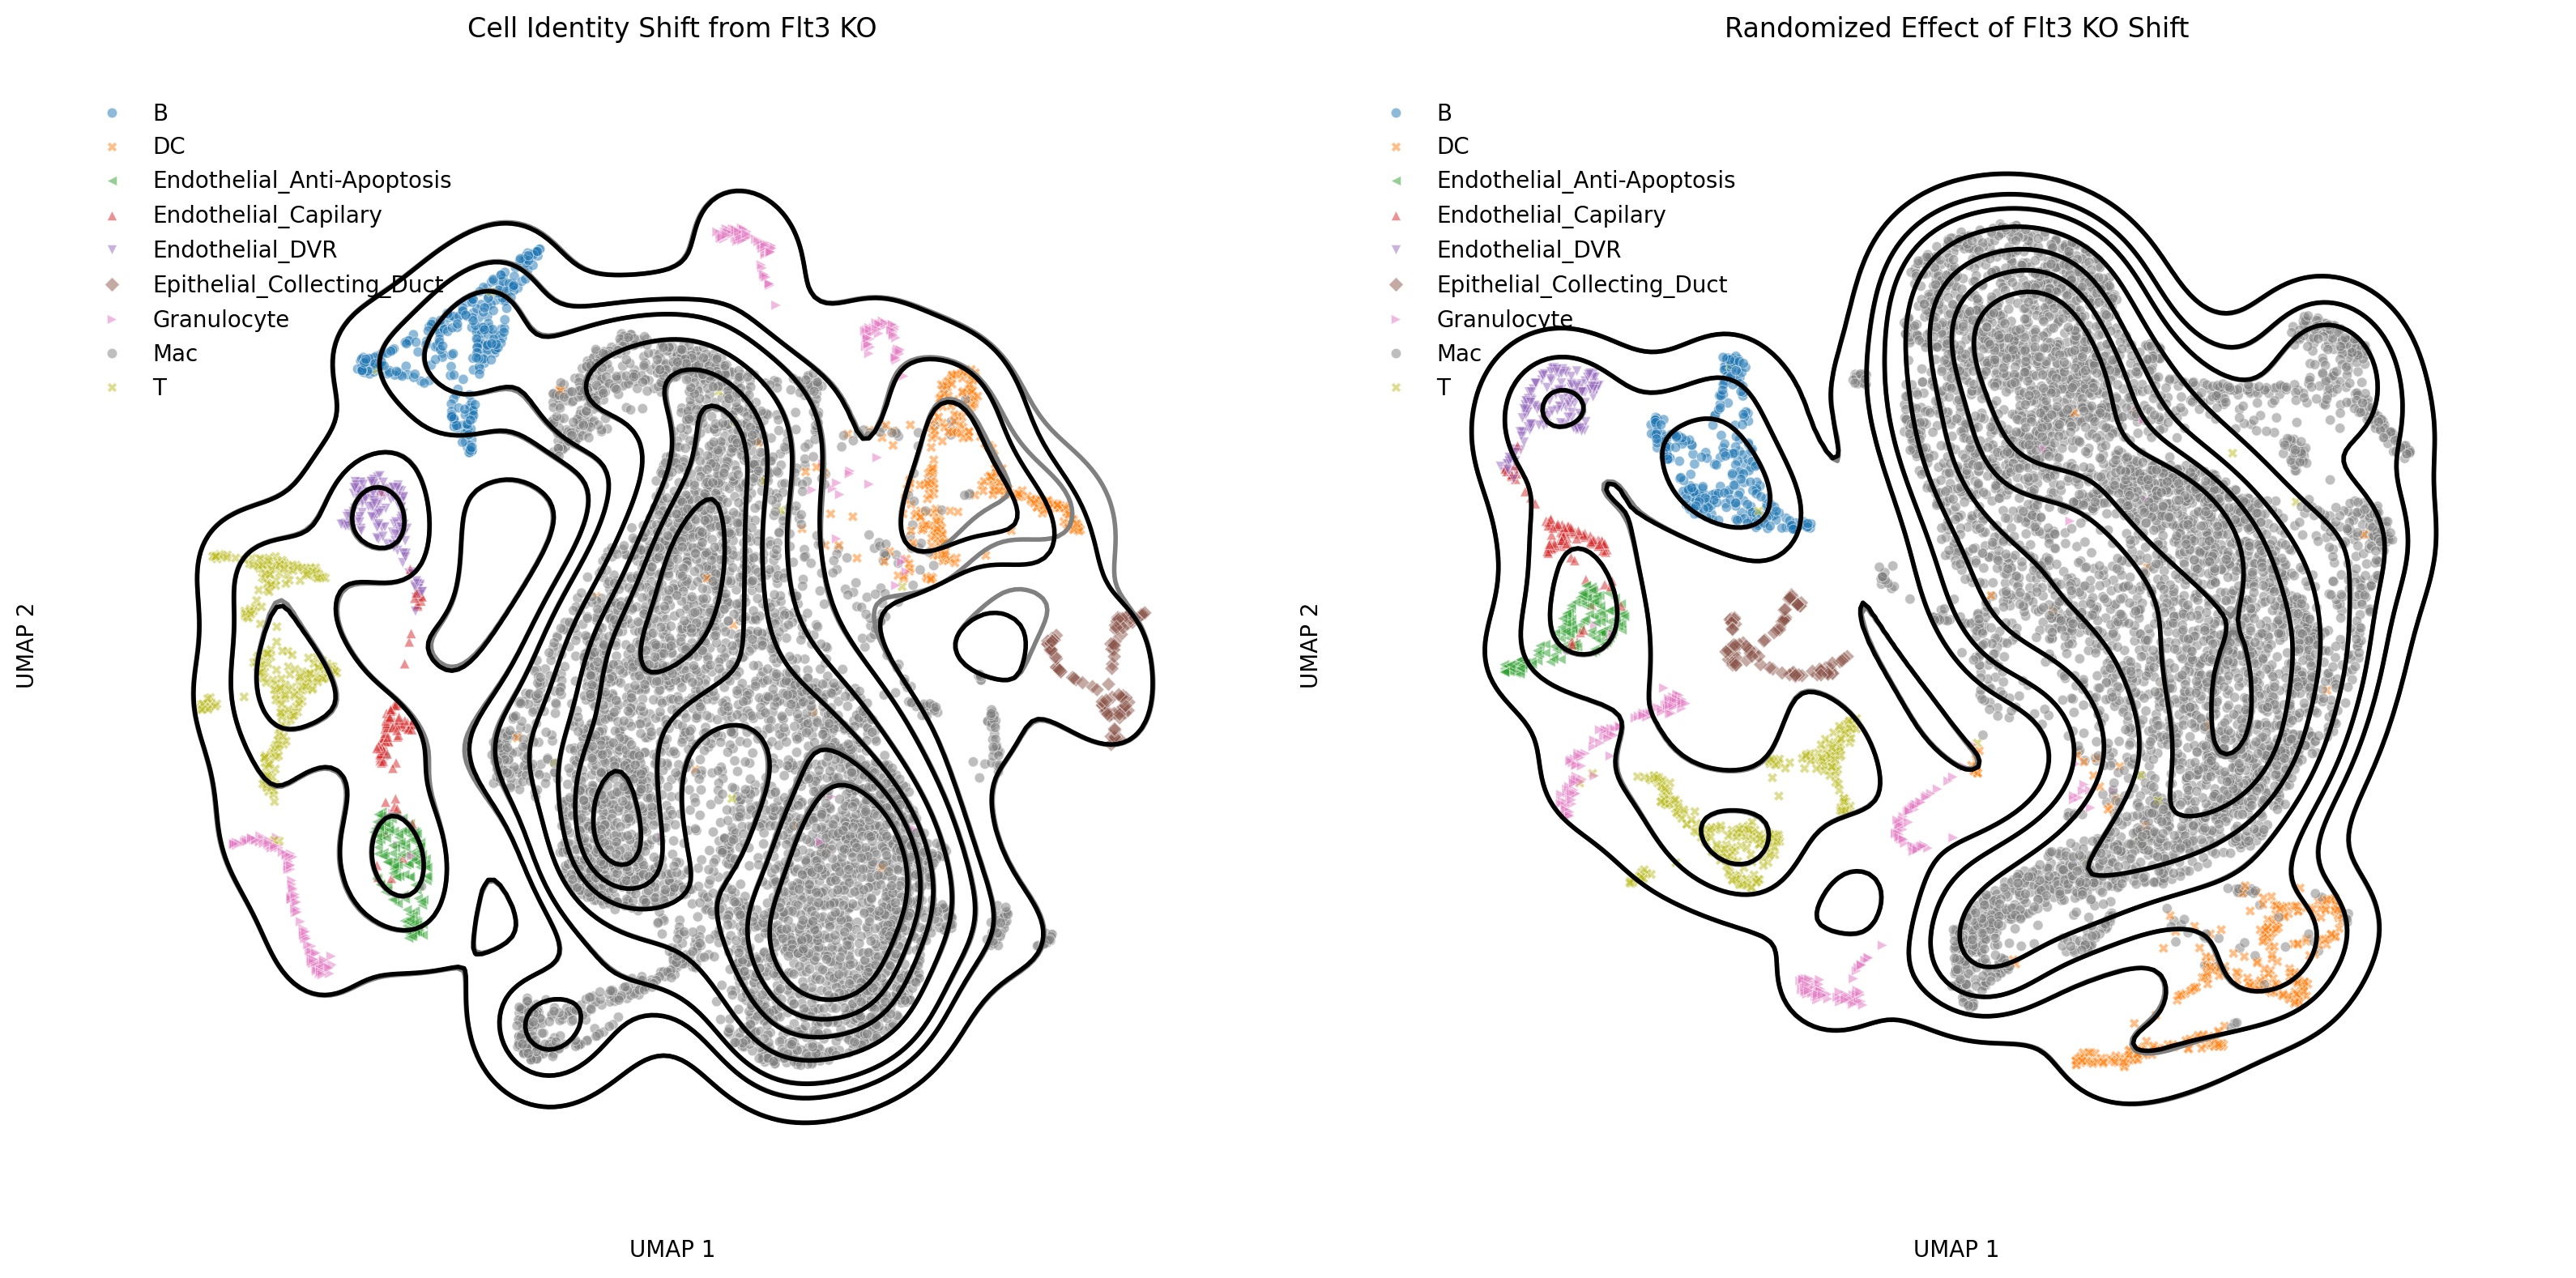

In [14]:
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 23722.37it/s]


2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 9157.61it/s] 


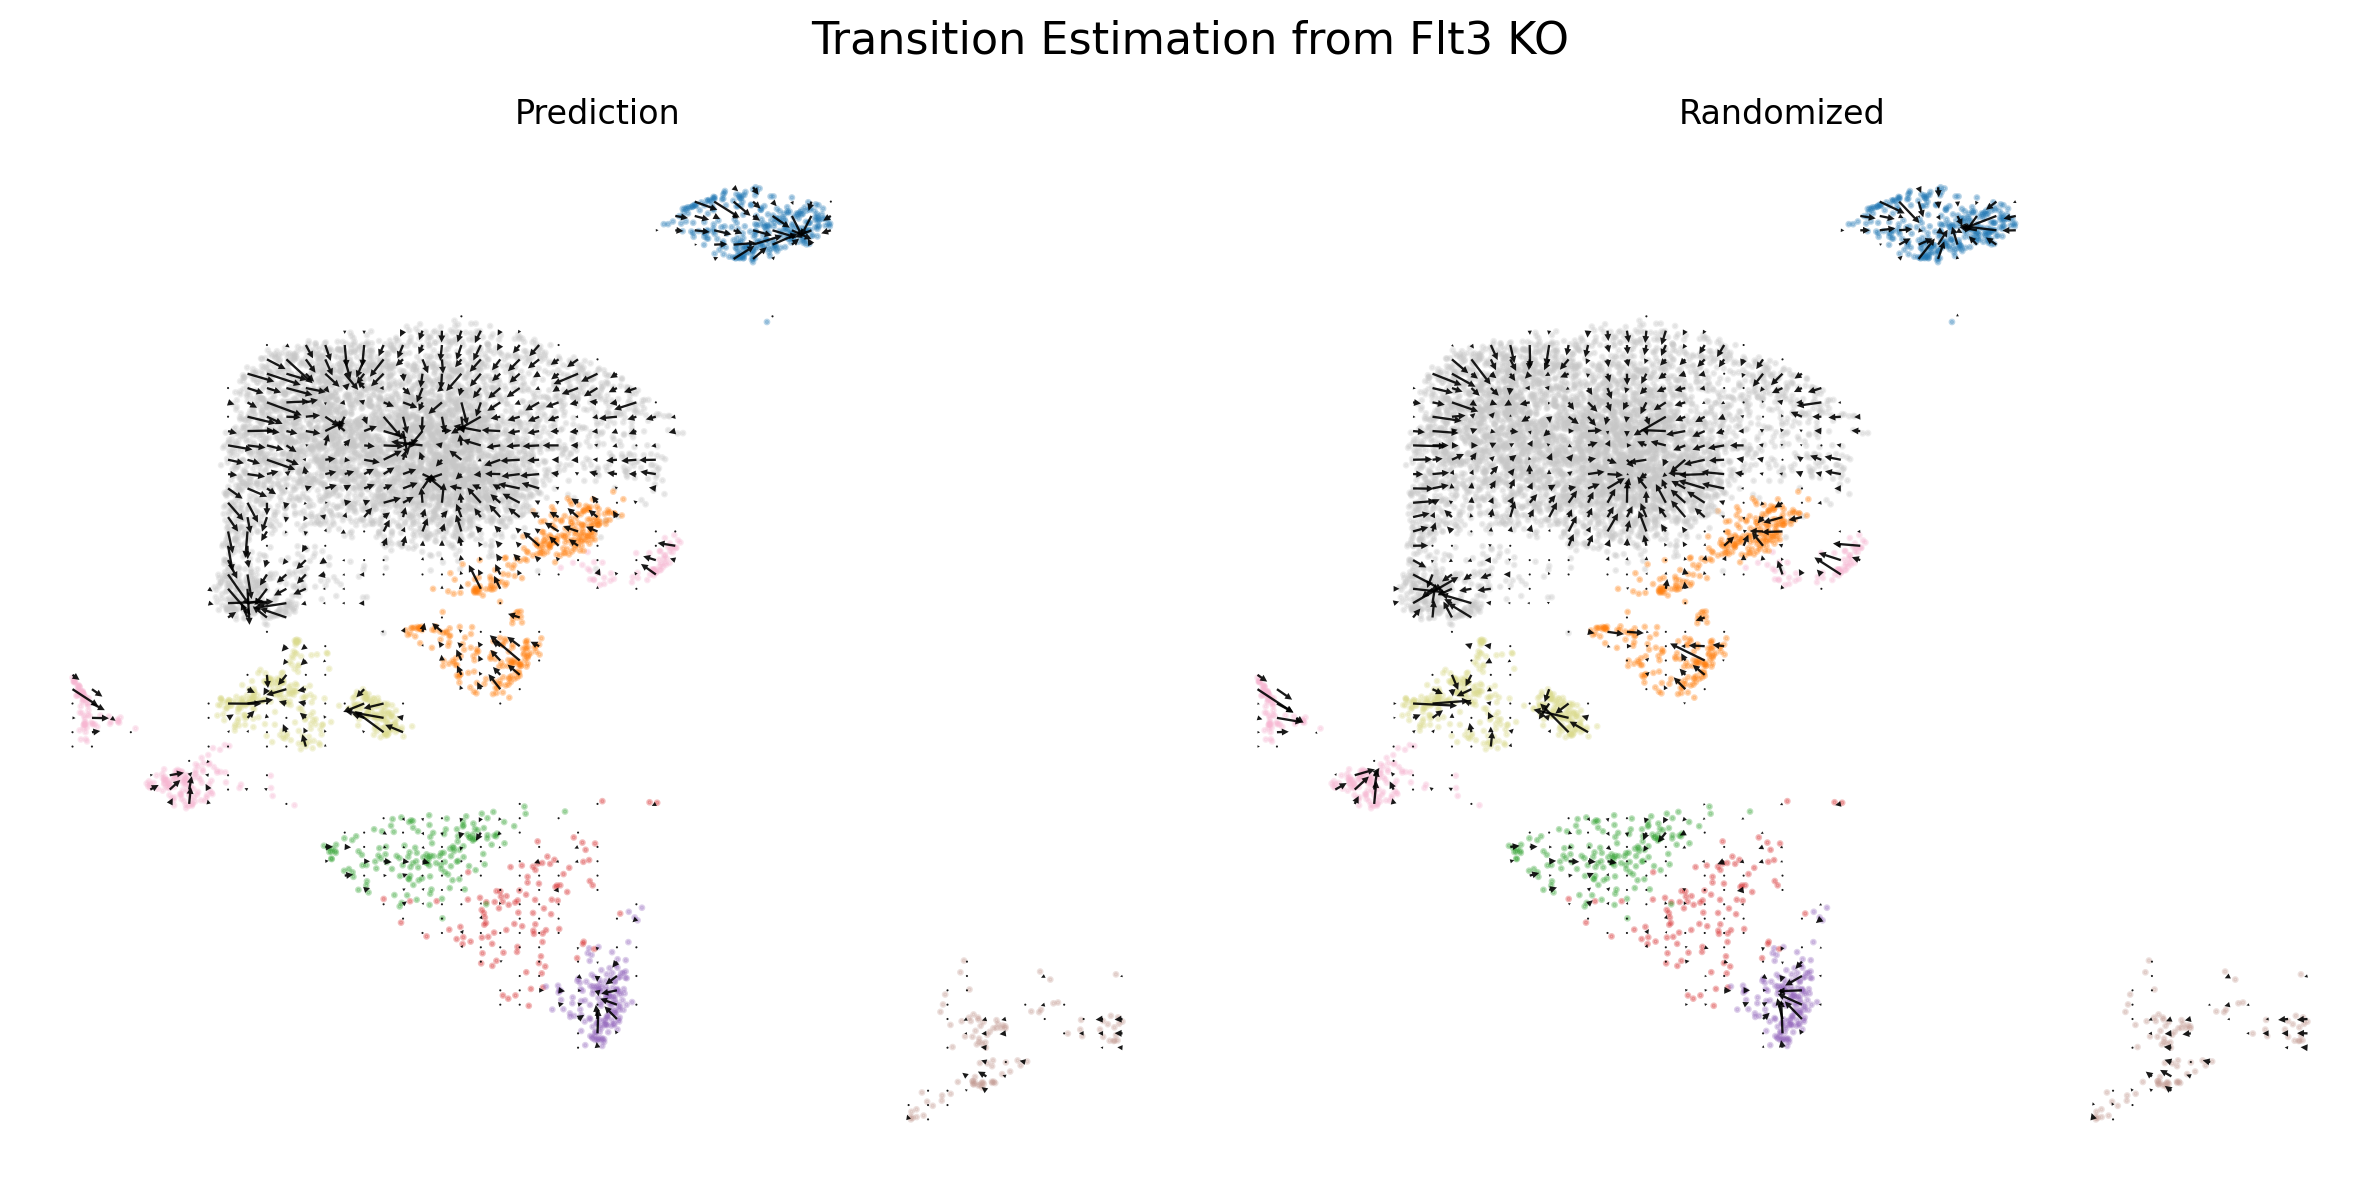

In [17]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['X_umap'],
    nn_embedding=pythia.adata.obsm['X_umap'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 23734.61it/s]


2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 23620.13it/s]


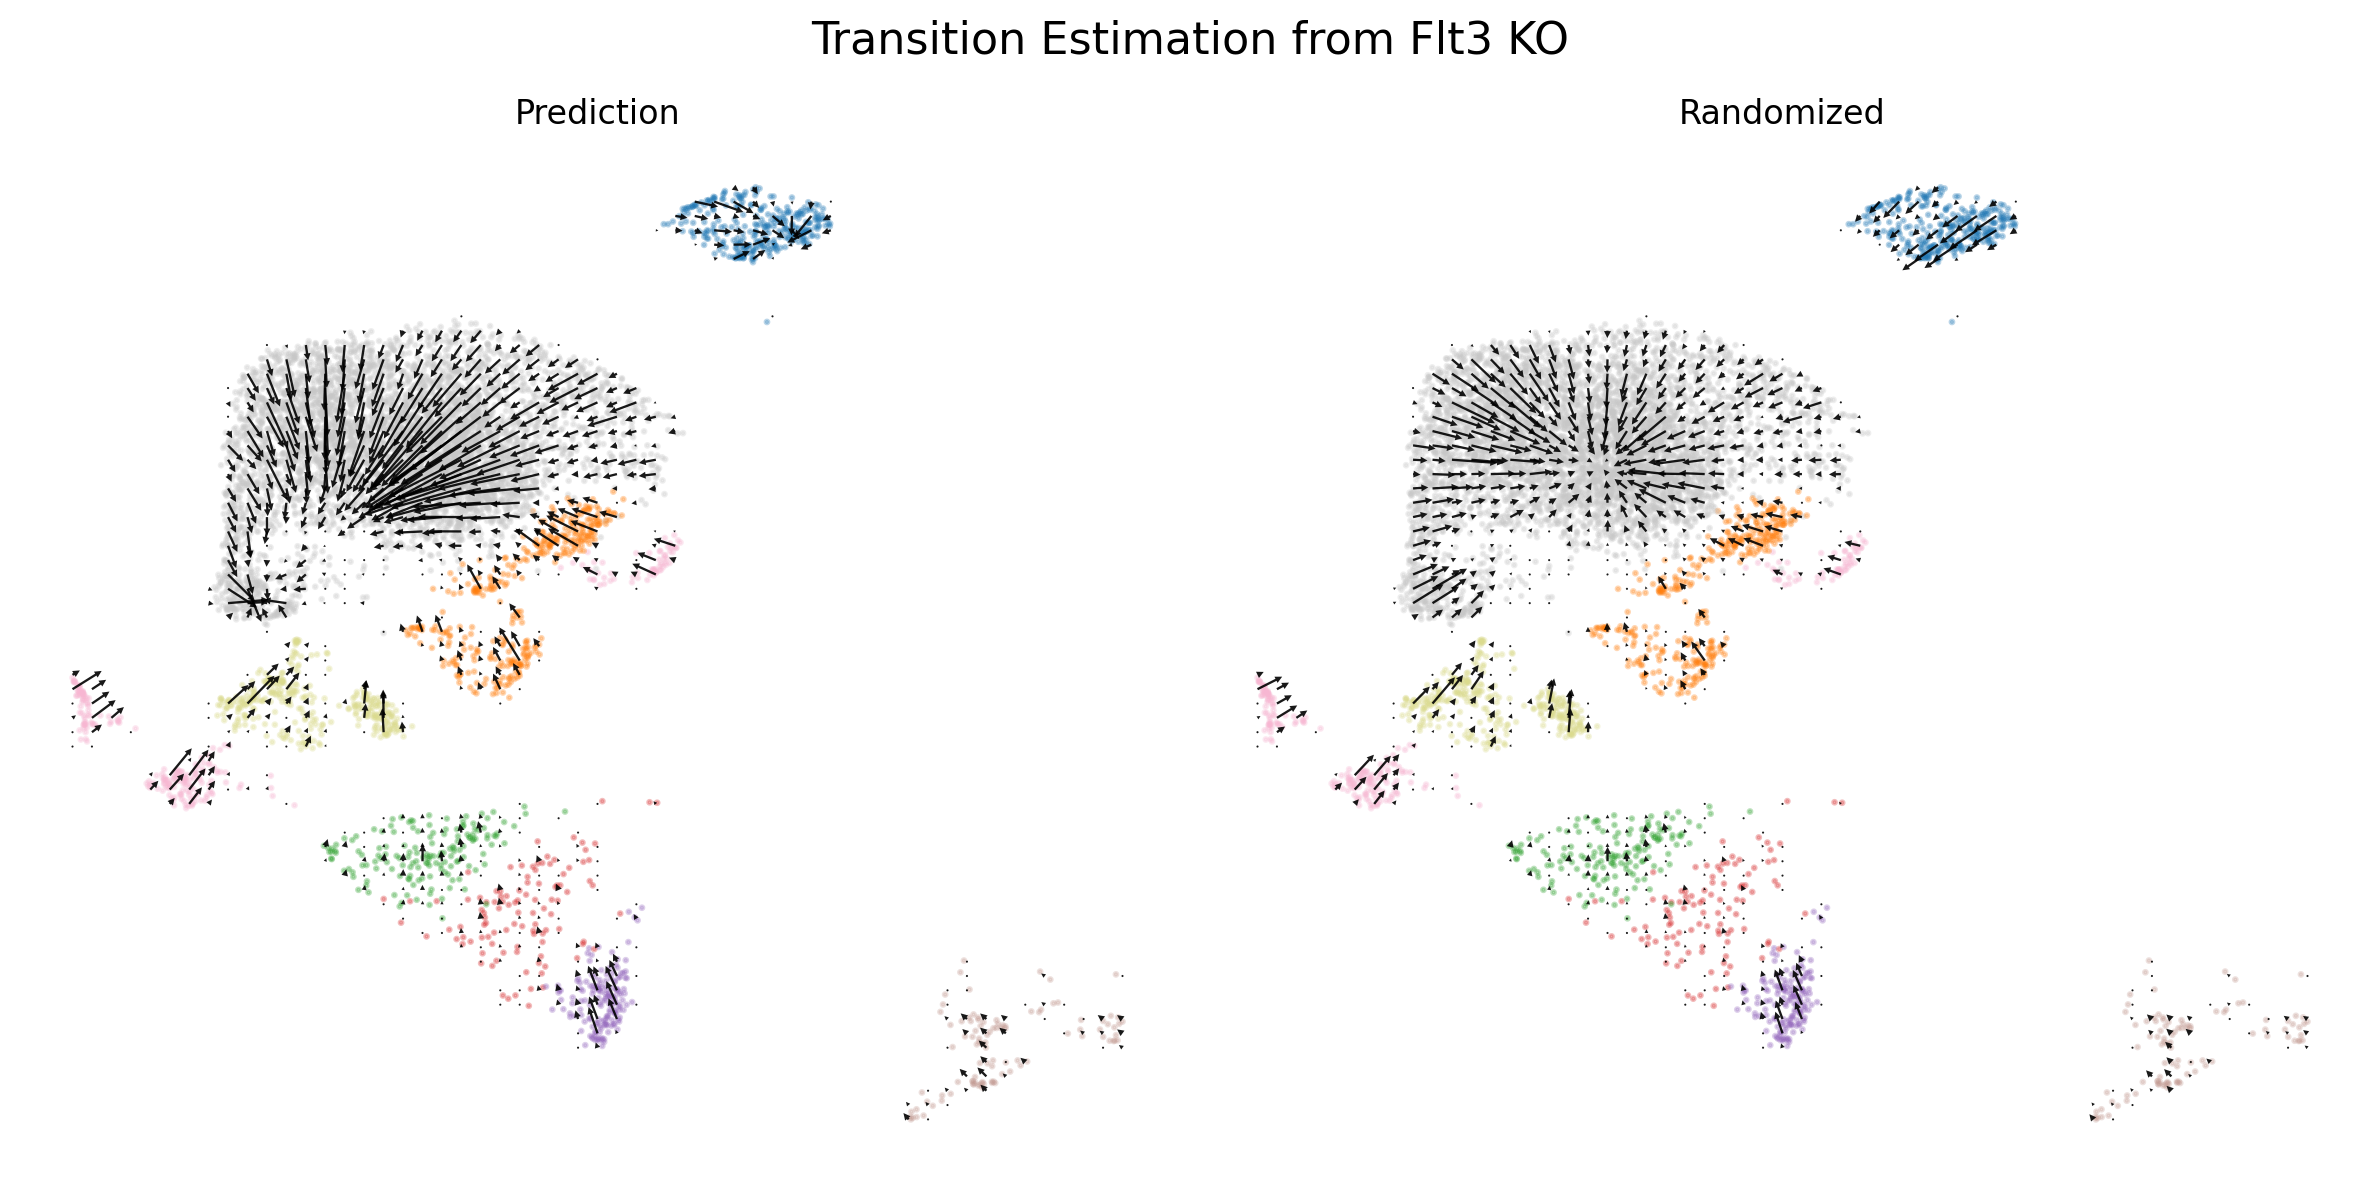

In [15]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['X_umap'],
    nn_embedding=pythia.adata.obsm['spatial'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

2.7971381486394145


Computing vectors: 100%|██████████| 5000/5000 [00:00<00:00, 9549.05it/s] 


2.7971381486394145


Computing vectors: 100%|██████████| 5000/5000 [00:00<00:00, 9747.47it/s] 


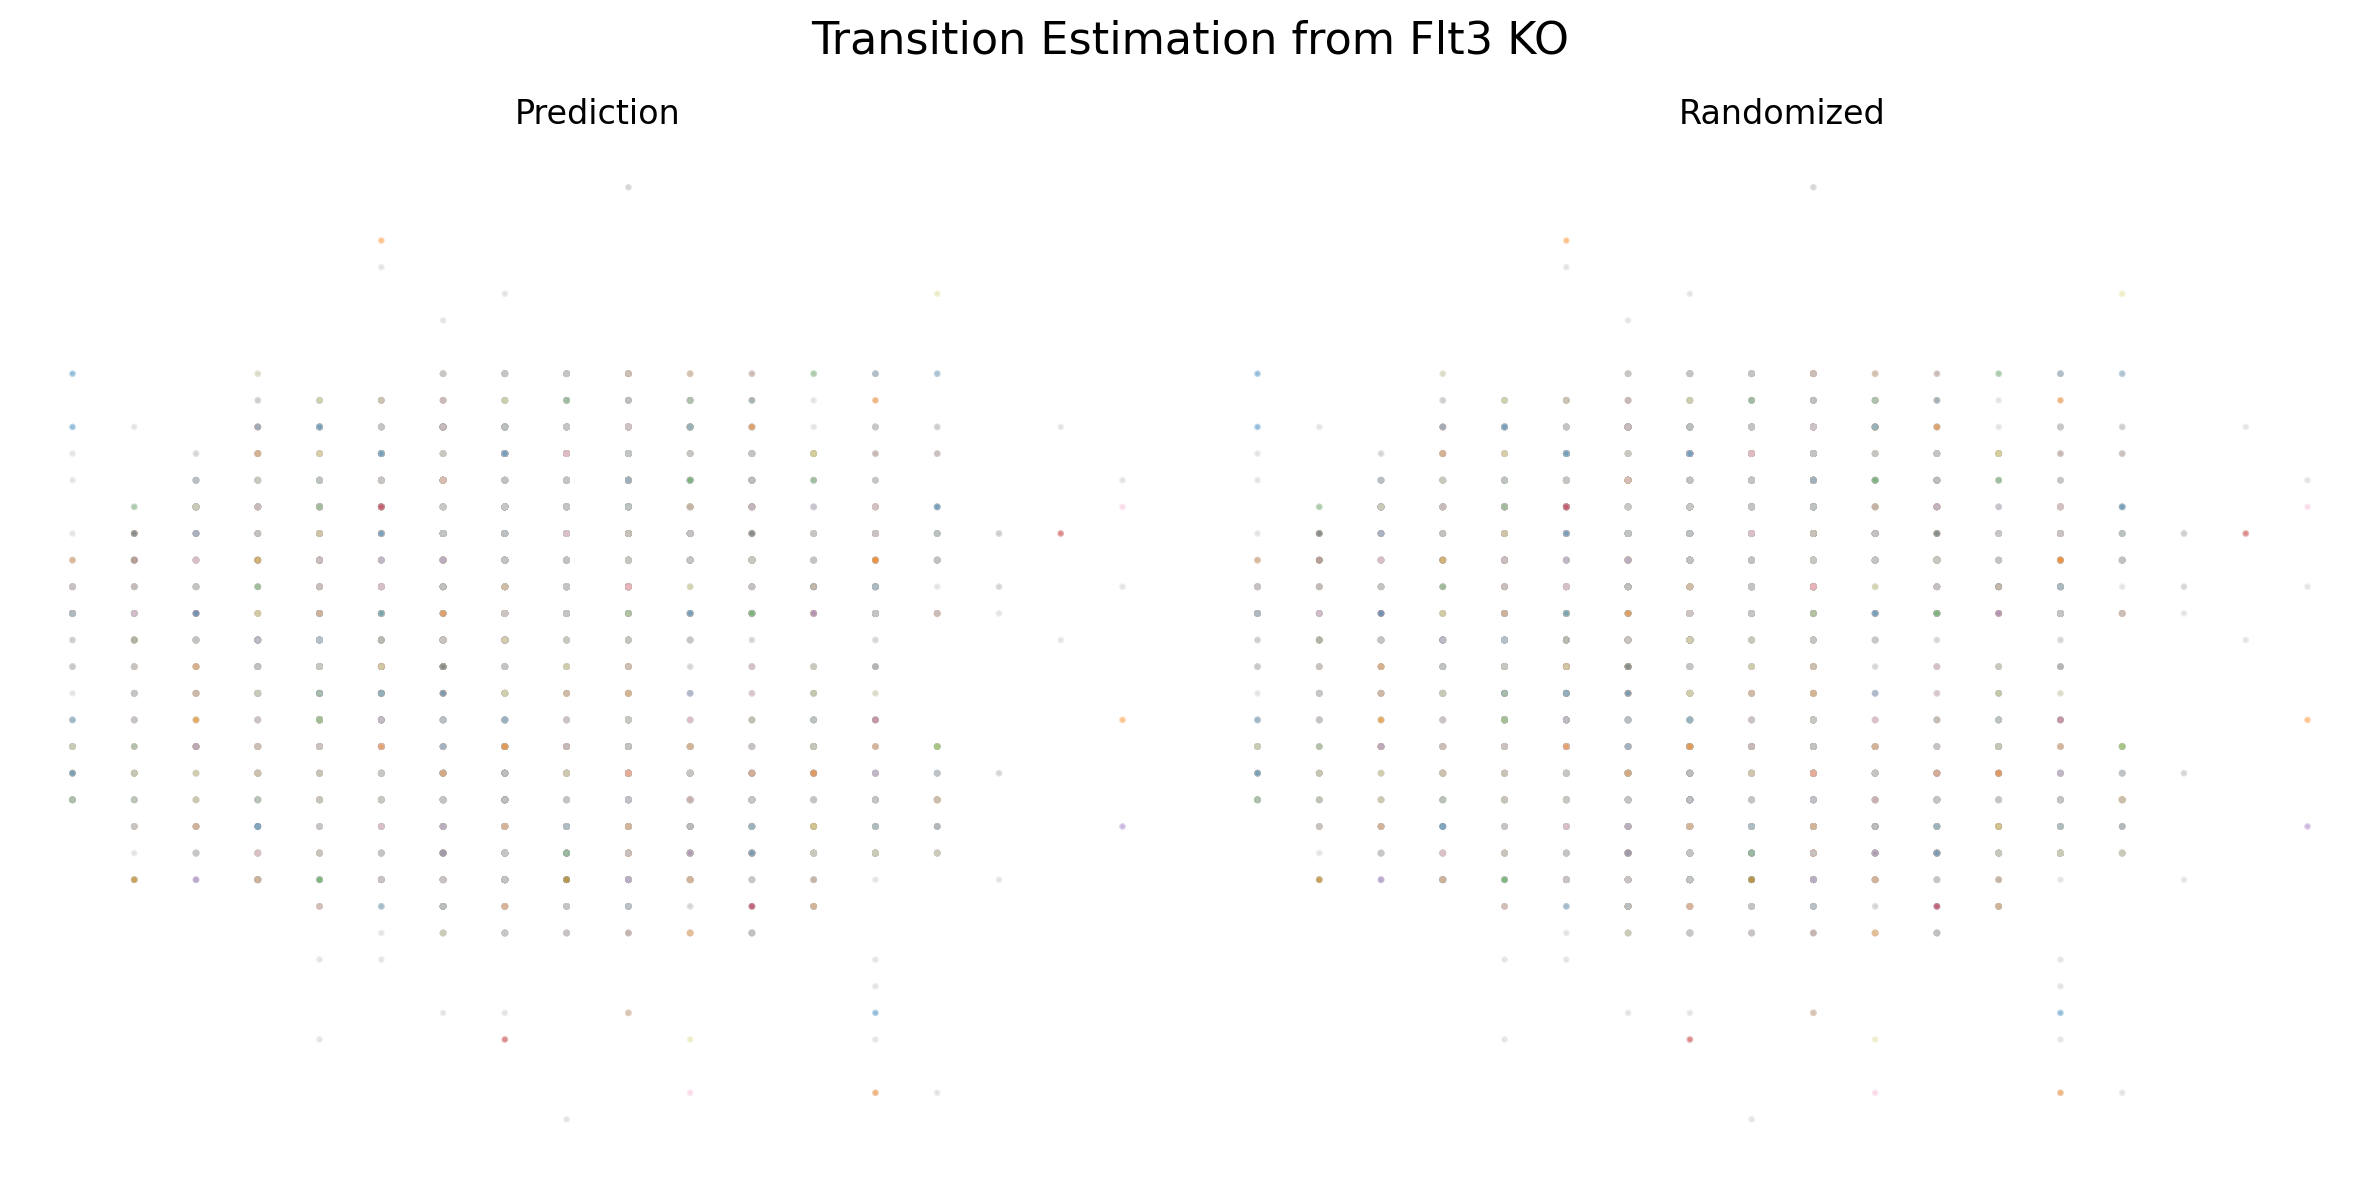

In [21]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['spatial'],
    nn_embedding=pythia.adata.obsm['spatial'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

In [ ]:
pythia.plot_beta_neighborhoods()
# pythia.plot_beta_umap(use_modulators=False)

In [ ]:
pythia.show_cluster_gex(embedding='UMAP')

In [ ]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores.png')
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}.png')

In [ ]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores_umap.png', show_spatial=False)
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}_spatial.png', show_spatial=False)

In [ ]:
gsea_scores = {}

for mod_name, mod_dict in pythia.gsea_modules.items():
    gene_list = mod_dict['geneSymbols']
    gene_list = [g for g in gene_list if g in pythia.adata.var_names]
    score_name = f'{mod_name}'

    sc.tl.score_genes(pythia.adata, gene_list, score_name=score_name, use_raw=False)

    gsea_scores[mod_name] = pythia.adata.obs[score_name]


In [ ]:
for mod_name in pythia.gsea_scores['observed'].index:
    if pythia.goi in pythia.gsea_modules[mod_name]['geneSymbols']:
        print(mod_name)

In [ ]:
pythia.plot_betas_goi(save_dir=save_dir, use_simulated=True)